<a href="https://colab.research.google.com/github/AnjaliMizJ/Data-Science-Project/blob/main/KNN_Cleaned_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Housing Data

In [ ]:

raw_data_df = pd.read_csv('/content/drive/MyDrive/Dataset/filtered_house_data.csv')
raw_data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,format_sold_price,age of house
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.000000,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,$5300.0k,83
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.000000,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,$4200.0k,27
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3716.366828,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,$4200.0k,27
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.000000,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,$4500.0k,94
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.000000,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,$3411.4k,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$495.0k,19
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.000000,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,$550.0k,34
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.000000,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,$475.0k,55
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$550.0k,15


# Adding another column/feature named Price_per_Sqrft and Rooms. This column is computed by dividing the Sold_Price by Sqrt_ft


In [ ]:
raw_data_df["Price_Per_Sqrft"] = raw_data_df["sold_price"]/raw_data_df["sqrt_ft"]
raw_data_df["rooms"] = raw_data_df["bedrooms"]+raw_data_df["bathrooms"]
raw_data_df["Price_Per_Sqrft"]

,Price_Per_Sqrft
0,504.761905
1,575.342466
2,1130.136016
3,498.946668
4,533.372420
...,...
4995,137.461816
4996,237.273512
4997,268.058691
4998,147.690655


In [ ]:
raw_data_df["Price_Cat"] = (raw_data_df["Price_Per_Sqrft"] // 50).astype(int)
raw_data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,garage,kitchen_features,fireplaces,floor_covering,HOA,format_sold_price,age of house,Price_Per_Sqrft,rooms,Price_Cat
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,$5300.0k,83,504.761905,23.0,10
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,$4200.0k,27,575.342466,4.0,11
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,$4200.0k,27,1130.136016,5.0,22
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,$4500.0k,94,498.946668,12.0,9
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,$3411.4k,29,533.372420,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,...,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$495.0k,19,137.461816,8.0,2
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,...,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,$550.0k,34,237.273512,7.0,4
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,...,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,$475.0k,55,268.058691,5.0,5
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,...,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$550.0k,15,147.690655,8.0,2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


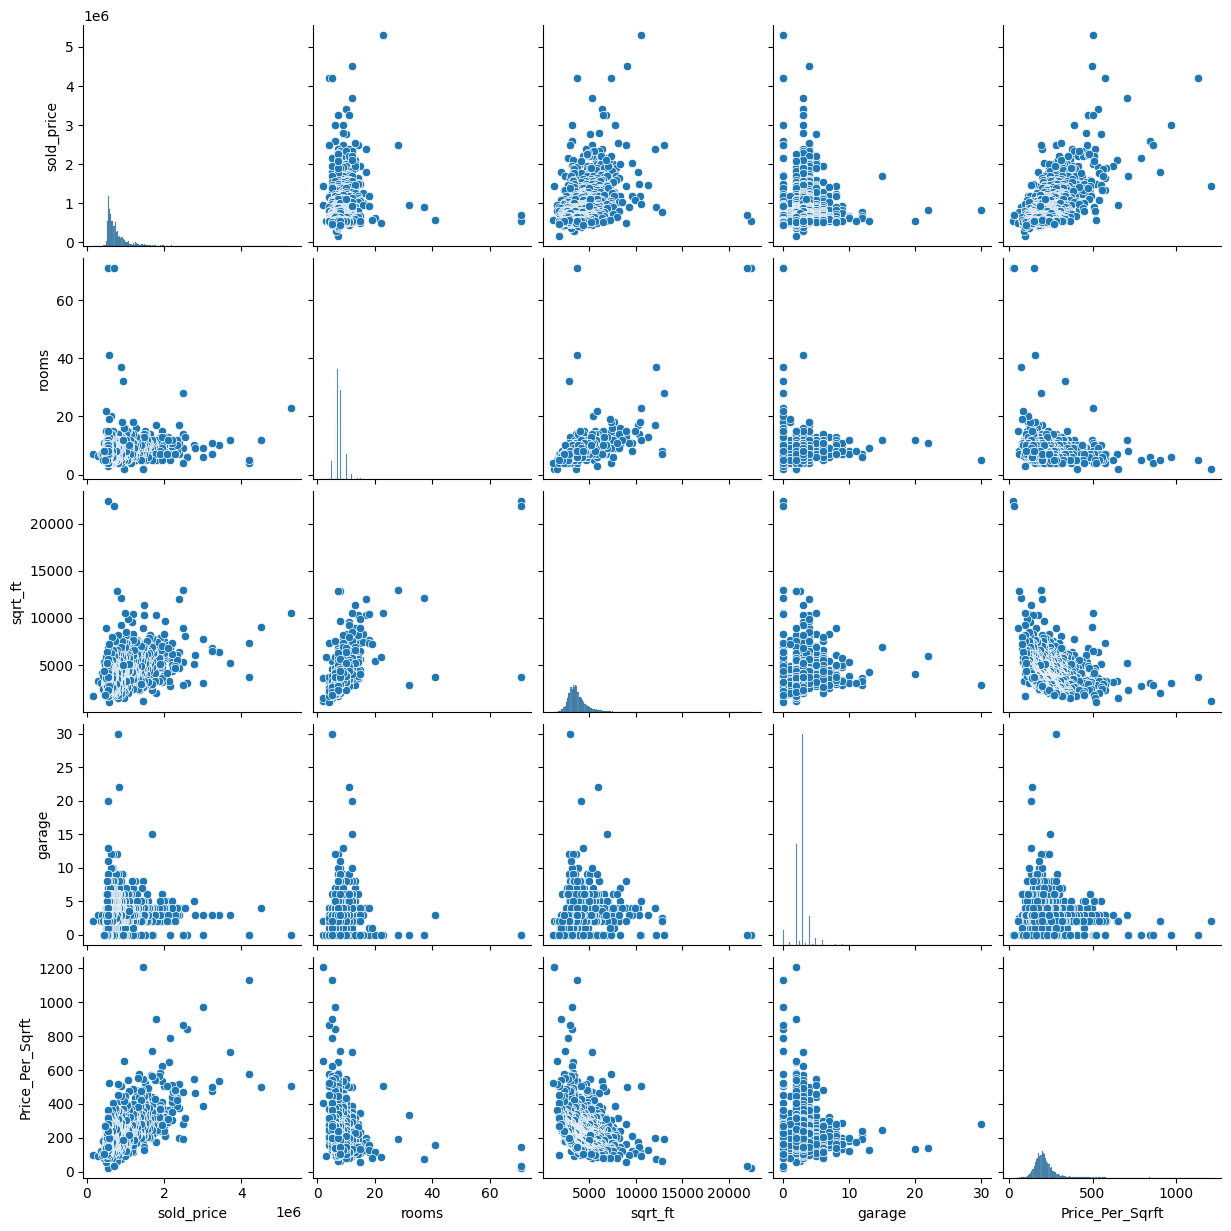

In [ ]:
cols = ['sold_price','rooms', 'sqrt_ft', 'garage', 'Price_Per_Sqrft']
sns.pairplot(raw_data_df[cols], size = 2.5)

In [ ]:
raw_data_df["Price_Cat"].unique()

array([10, 11, 22,  9,  3,  5, 14,  6,  7, 19, 16,  8, 17,  4, 18, 15, 12,
        1,  2, 24, 13,  0])

# Prepare the input features

In [ ]:
raw_data_df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'format_sold_price', 'age of house', 'Price_Per_Sqrft', 'rooms',
       'Price_Cat'],
      dtype='object')

In [ ]:
raw_data_df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


# Data is split into Test and Training Data.
# Convert Test Data and Training Data to Numpy

In [ ]:
# Set test size
test_size = 0.2

# Randomly sample the set
test_df1 = raw_data_df[["longitude", "latitude","Price_Cat"]].sample(frac=test_size, random_state = 42)
test_df1

,longitude,latitude,Price_Cat
1501,-111.027838,32.431599,4
2586,-110.881391,32.325324,3
2653,-110.925760,32.226746,2
1055,-110.921369,32.228471,4
705,-110.887241,32.266454,5
...,...,...,...
4711,-110.954196,32.302157,3
2313,-110.969772,32.338247,3
3214,-111.020383,32.434134,1
2732,-110.888436,32.326338,3


In [ ]:
#Drop the rows of the train_df from df_House dataframe using their indexes to create a test Data with what is left
train_df1 = raw_data_df[["longitude", "latitude","Price_Cat"]].drop(test_df.index)
train_df1

,longitude,latitude,Price_Cat
0,-110.378200,31.356362,10
1,-111.045371,31.594213,11
2,-111.040707,31.594844,22
3,-111.035925,31.645878,9
4,-110.813768,32.285162,10
...,...,...,...
4994,-110.922291,32.317496,5
4995,-110.661829,31.907917,2
4997,-110.755428,32.964708,5
4998,-111.055528,32.296871,2


In [ ]:
X_train = train_df1[["longitude", "latitude"]].to_numpy()
y = train_df1["Price_Cat"].to_numpy()

In [ ]:
print(X_train.shape)

(4001, 2)


In [ ]:
X_train

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-111.040707,   31.594844],
       ...,
       [-110.755428,   32.964708],
       [-111.055528,   32.296871],
       [-110.913054,   31.385259]])

In [ ]:
y

array([10, 11, 22, ...,  5,  2,  2])

In [ ]:
X_test_knnclass = test_df1[["longitude", "latitude"]].to_numpy()
y_test_knnclass = test_df1["Price_Cat"].to_numpy()

K Nearest Neighbor using Long/Lat to predict prices Classifier

In [ ]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict(self, X, k, epsilon=1e-10):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum(((self.X-X[i])**2), axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(X_train,y)

In [ ]:
y_hat = knn.predict(X_train,9)
accuracy(y,y_hat)

0.9907523119220195

In [ ]:
y_hat

array([10., 11., 22., ...,  5.,  2.,  2.])

In [ ]:
y_hat_test = knn.predict(X_test_knnclass,9)
accuracy(y_test_knnclass,y_hat_test)

0.703

In [ ]:
X_test_knnclass

array([[-111.027838,   32.431599],
       [-110.881391,   32.325324],
       [-110.92576 ,   32.226746],
       ...,
       [-111.020383,   32.434134],
       [-110.888436,   32.326338],
       [-110.832873,   32.315192]])

In [ ]:
#y_test_knnclass

In [ ]:
#y_hat_test

(32.2, 32.6)

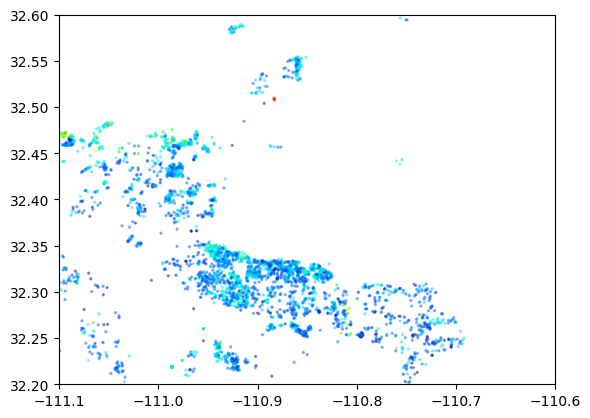

In [ ]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c = y_hat, s=2, alpha = 0.4 , cmap = 'gist_ncar')
plt.xlim(-111.1, -110.6)
plt.ylim(32.2, 32.6)

## Adding Square fit category to Dataframe

In [ ]:
#raw_data_df

In [ ]:
data= raw_data_df[['sold_price','lot_acres', 'sqrt_ft','garage', 'rooms' ,'Price_Cat']].copy()
data

,sold_price,lot_acres,sqrt_ft,garage,rooms,Price_Cat
0,5300000.0,2154.00,10500.000000,0.0,23.0,10
1,4200000.0,1707.00,7300.000000,0.0,4.0,11
2,4200000.0,1707.00,3716.366828,0.0,5.0,22
3,4500000.0,636.67,9019.000000,4.0,12.0,9
4,3411450.0,3.21,6396.000000,3.0,10.0,10
...,...,...,...,...,...,...
4995,495000.0,4.98,3601.000000,3.0,8.0,2
4996,550000.0,1.42,2318.000000,3.0,7.0,4
4997,475000.0,12.06,1772.000000,0.0,5.0,5
4998,550000.0,1.01,3724.000000,3.0,8.0,2


In [ ]:
data= data.dropna()

In [ ]:
data.isnull().sum()

,0
sold_price,0
lot_acres,0
sqrt_ft,0
garage,0
rooms,0
Price_Cat,0


In [ ]:
X = data.to_numpy()
y = X[:,0]
X = X[:,4]

In [ ]:
y.shape

(4994,)

In [ ]:
X.shape

(4994,)

# KNN Regressor

In [ ]:

# Set test size
test_size = 0.2

# Randomly sample the set
test_df = data.sample(frac=test_size, random_state = 42)
test_df

,sold_price,lot_acres,sqrt_ft,garage,rooms,Price_Cat
84,1825000.0,1.02,7451.0,3.0,12.0,4
1144,897000.0,0.65,3115.0,3.0,7.0,5
2951,640000.0,0.83,2804.0,3.0,6.0,4
653,1025000.0,0.77,3962.0,2.0,6.0,5
2291,725000.0,0.60,2594.0,1.0,8.0,5
...,...,...,...,...,...,...
2655,620000.0,35.10,2825.0,3.0,5.0,4
2964,640000.0,0.63,3930.0,3.0,9.0,3
1777,769000.0,1.28,3330.0,3.0,8.0,4
1736,775000.0,76.92,4800.0,6.0,7.0,3


In [ ]:
#Drop the rows of the train_df from df_House dataframe using their indexes to create a test Data with what is left
train_df = data.drop(test_df.index)
train_df

,sold_price,lot_acres,sqrt_ft,garage,rooms,Price_Cat
0,5300000.0,2154.00,10500.000000,0.0,23.0,10
1,4200000.0,1707.00,7300.000000,0.0,4.0,11
2,4200000.0,1707.00,3716.366828,0.0,5.0,22
3,4500000.0,636.67,9019.000000,4.0,12.0,9
4,3411450.0,3.21,6396.000000,3.0,10.0,10
...,...,...,...,...,...,...
4994,535000.0,0.18,2106.000000,2.0,5.0,5
4995,495000.0,4.98,3601.000000,3.0,8.0,2
4997,475000.0,12.06,1772.000000,0.0,5.0,5
4998,550000.0,1.01,3724.000000,3.0,8.0,2


In [ ]:
y_train = train_df["sold_price"].to_numpy()
y_test = test_df["sold_price"].to_numpy()
y_train

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [ ]:
X_train = train_df[['lot_acres', 'sqrt_ft','garage', 'rooms' ,'Price_Cat']].to_numpy()
X_test = test_df[['lot_acres',  'sqrt_ft','garage', 'rooms' ,'Price_Cat']].to_numpy()
X_train

array([[2.15400000e+03, 1.05000000e+04, 0.00000000e+00, 2.30000000e+01,
        1.00000000e+01],
       [1.70700000e+03, 7.30000000e+03, 0.00000000e+00, 4.00000000e+00,
        1.10000000e+01],
       [1.70700000e+03, 3.71636683e+03, 0.00000000e+00, 5.00000000e+00,
        2.20000000e+01],
       ...,
       [1.20600000e+01, 1.77200000e+03, 0.00000000e+00, 5.00000000e+00,
        5.00000000e+00],
       [1.01000000e+00, 3.72400000e+03, 3.00000000e+00, 8.00000000e+00,
        2.00000000e+00],
       [4.16000000e+00, 4.31700000e+03, 0.00000000e+00, 8.00000000e+00,
        2.00000000e+00]])

In [ ]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):

    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [ ]:
knnr = KNNRegressor()
knnr.fit(X_train, y_train)

In [ ]:
y_hat_train1 = knnr.predict(X_train,8)
y_hat_train2 = knnr.predict(X_train,3)
y_hat_train3 = knnr.predict(X_train,2)

In [ ]:
y_test_hat = knnr.predict(X_test,6)

In [ ]:
#y_test_hat

In [ ]:
X_test

array([[1.020e+00, 7.451e+03, 3.000e+00, 1.200e+01, 4.000e+00],
       [6.500e-01, 3.115e+03, 3.000e+00, 7.000e+00, 5.000e+00],
       [8.300e-01, 2.804e+03, 3.000e+00, 6.000e+00, 4.000e+00],
       ...,
       [1.280e+00, 3.330e+03, 3.000e+00, 8.000e+00, 4.000e+00],
       [7.692e+01, 4.800e+03, 6.000e+00, 7.000e+00, 3.000e+00],
       [2.280e+00, 3.710e+03, 3.000e+00, 7.000e+00, 3.000e+00]])

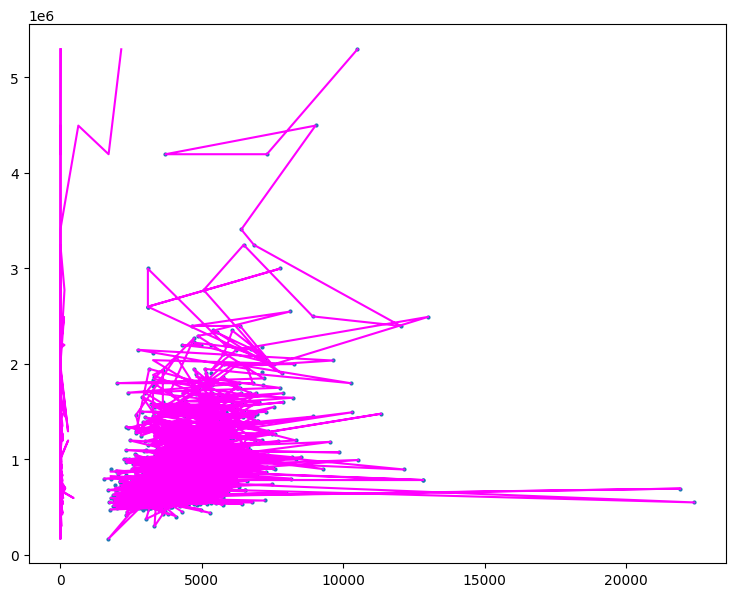

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(X_train[:,1],y_train, s=4)
plt.plot(X_train, y_hat_train1, color="#FF00FF")
#plt.plot(X_train, y_hat_train2, color="#7000FF")
#plt.plot(X_train, y_hat_train3, color="#00FF00")

# Multivariate Models

In [ ]:
from scipy.stats import multivariate_normal as mvn

In [ ]:
data=data[['sold_price','lot_acres', 'sqrt_ft','garage' ,'rooms' ,'Price_Cat']]
data.describe()

,sold_price,lot_acres,sqrt_ft,garage,rooms,Price_Cat
count,4.994000e+03,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,7.748700e+05,4.664422,3716.366828,2.812175,7.765018,3.753504
std,3.186641e+05,51.664424,1115.058123,1.197402,2.418510,1.385280
min,1.690000e+05,0.000000,1100.000000,0.000000,2.000000,0.000000
25%,5.850000e+05,0.580000,3051.000000,2.000000,7.000000,3.000000
50%,6.750000e+05,0.990000,3524.000000,3.000000,7.000000,4.000000
75%,8.357500e+05,1.770000,4120.750000,3.000000,9.000000,4.000000
max,5.300000e+06,2154.000000,22408.000000,30.000000,71.000000,24.000000


In [ ]:
data.isnull().sum()

,0
sold_price,0
lot_acres,0
sqrt_ft,0
garage,0
rooms,0
Price_Cat,0


In [ ]:
data = data.dropna()

In [ ]:
X=data.to_numpy()

In [ ]:
y=X[:,0]
X=X[:,1:]

In [ ]:
y

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [ ]:
X

array([[2.15400000e+03, 1.05000000e+04, 0.00000000e+00, 2.30000000e+01,
        1.00000000e+01],
       [1.70700000e+03, 7.30000000e+03, 0.00000000e+00, 4.00000000e+00,
        1.10000000e+01],
       [1.70700000e+03, 3.71636683e+03, 0.00000000e+00, 5.00000000e+00,
        2.20000000e+01],
       ...,
       [1.20600000e+01, 1.77200000e+03, 0.00000000e+00, 5.00000000e+00,
        5.00000000e+00],
       [1.01000000e+00, 3.72400000e+03, 3.00000000e+00, 8.00000000e+00,
        2.00000000e+00],
       [4.16000000e+00, 4.31700000e+03, 0.00000000e+00, 8.00000000e+00,
        2.00000000e+00]])

In [ ]:
X.shape

(4994, 5)

# Helpful Functions

In [ ]:
def MAE(Y,Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y,Y_hat):
  N= len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

## OLS Multivariate(mv) Linear Regression Class

In [ ]:
class MVLinearRegression():

  def fit(self, X, y, eta= 1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    print(X)
    N, D = X.shape
    Y=y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

[[2.15400000e+03 1.05000000e+04 0.00000000e+00 2.30000000e+01
  1.00000000e+01]
 [1.70700000e+03 7.30000000e+03 0.00000000e+00 4.00000000e+00
  1.10000000e+01]
 [1.70700000e+03 3.71636683e+03 0.00000000e+00 5.00000000e+00
  2.20000000e+01]
 ...
 [1.20600000e+01 1.77200000e+03 0.00000000e+00 5.00000000e+00
  5.00000000e+00]
 [1.01000000e+00 3.72400000e+03 3.00000000e+00 8.00000000e+00
  2.00000000e+00]
 [4.16000000e+00 4.31700000e+03 0.00000000e+00 8.00000000e+00
  2.00000000e+00]]


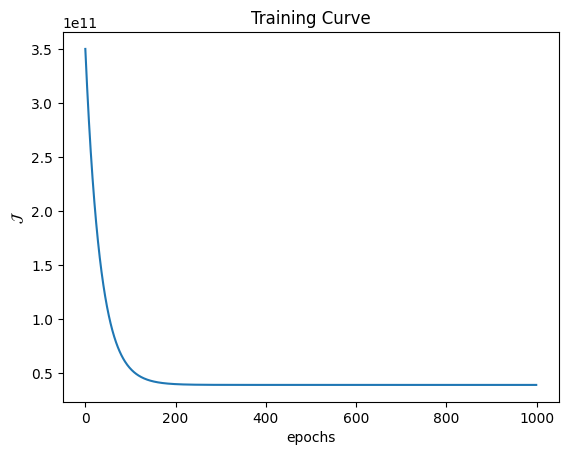

In [ ]:
my_reg = MVLinearRegression()
my_reg.fit(X,y, eta=1e-9, epochs=1e3, show_curve=True)

In [ ]:
y_hat_test = my_reg.predict(X_test)

In [ ]:
3# Assign Test values (Square Feet,Lot_acres, Rooms, Knn_Weight)
Xtest = np.array([[ 1.00000000e+00,  3.49500000e+03,
        1.96600000e+03,  8.00000000e+00,  3.00000000e+00],[3.30000000e+00, 6.49600000e+03,
        2.00800000e+03,  9.00000000e+00,  5.00000000e+00]])
#'sold_price','lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat'

In [ ]:
X_test[1]

array([6.500e-01, 3.115e+03, 3.000e+00, 7.000e+00, 5.000e+00])

In [ ]:
# Predict price
my_reg.predict(Xtest)

array([ 711284.31922245, 1322435.56911123])

In [ ]:
R2(y_test,y_hat_test)

-0.691882912421

In [ ]:
MAE(y_test,y_hat_test)

193.5751818607519

In [ ]:
OLS(y_test,y_hat_test,2)

17251597350548.29

## INPUT FUNCTION

In [ ]:
def input_price_func(pred_cat):

  print('the predicted category is :',pred_cat )


  lot_acres = float(input("Enter lot_acres"))
  print(lot_acres)

  sqrt_ft = float(input("Enter sqrt_ft"))
  print(sqrt_ft)
  garage = float(input("Enter number of garage"))
  print(garage)
  rooms = float(input("Enter rooms"))
  print(rooms)


  Xtest = np.array([[ lot_acres , sqrt_ft, garage, rooms,  pred_cat]])

  predictprice = my_reg.predict(Xtest)

  print('The predicted price is :', predictprice[0])

  return

In [ ]:
def lat_lon():

  longitude = float(input("Enter longitude"))
  print('longitude is ', longitude)
  latitude = float(input("Enter latitude"))
  print('latitude is ',latitude)

  pred_cat = knn.predict(np.array([[longitude, latitude]]),9)
  print('the predicted category is :',pred_cat[0] )

  return pred_cat[0]

In [ ]:
cat_pred = lat_lon()

Enter longitude-110.91507
longitude is  -110.91507
Enter latitude32.286169
latitude is  32.286169
the predicted category is : 3.0


In [ ]:
input_price_func(cat_pred)

the predicted category is : 3.0
Enter lot_acres1.71
1.71
Enter sqrt_ft4743
4743.0
Enter number of garage3
3.0
Enter rooms9
9.0
The predicted price is : 965912.3304788452


In [ ]:
203644.66353191464, 155000
198552.6974142684, 165000
329298.2381931414, 320000
965912.3304788452, 1200000